In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sc

In [20]:
datos = "../data/FluidosPerfo.csv"
flu = pd.read_csv(datos, skiprows=[0,1], index_col=0)

<ipython-input-22-18a20d7f3b32>:31: RuntimeWarning: invalid value encountered in log
  coef4 = sc.curve_fit(lambda x, a, b, c, k:((a*c-b)*np.log(c*x+1))/c**2+b*x/c+k, x, y)


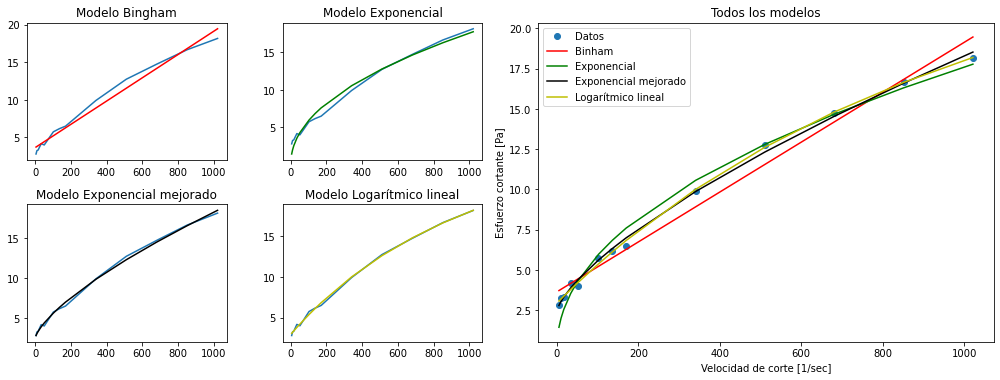

In [22]:
fig = plt.figure(figsize=(14,10))

x = np.array(flu.index)
y = np.array(flu.TAU)

#Modelo Bingham
coef = np.polyfit(x, y, 1)
z1 = coef[0]*x + coef[1]
ax0 = plt.subplot2grid((4,4), loc=(0,0))
ax0.plot(x,y)
ax0.plot(x,z1, "r")
ax0.set_title("Modelo Bingham")
         
#Modelo Exponencial
coef2 = sc.curve_fit(lambda x, a, b: a*(x ** b), x, y)
z2 = coef2[0][0]*(x ** coef2[0][1])
ax1 = plt.subplot2grid((4,4), loc=(0,1))
ax1.plot(x,y)
ax1.plot(x,z2, "g")
ax1.set_title("Modelo Exponencial")

#Modelo Exponencial modificado
coef3 = sc.curve_fit(lambda x, a, b, c: a+b*(x ** c), x, y)
z3 = coef3[0][0] + coef3[0][1]*(x ** coef3[0][2])
ax2 = plt.subplot2grid((4,4), loc=(1,0))
ax2.plot(x,y)
ax2.plot(x,z3, "k")
ax2.set_title("Modelo Exponencial mejorado")

#Modelo Logarítmico lineal
coef4 = sc.curve_fit(lambda x, a, b, c, k:((a*c-b)*np.log(c*x+1))/c**2+b*x/c+k, x, y)
a = coef4[0][0]
b = coef4[0][1]
c = coef4[0][2]
k = coef4[0][3]
z4 = ((a*c-b)*np.log(c*x+1))/c**2+b*x/c+k
ax3 = plt.subplot2grid((4,4), loc=(1,1))
ax3.plot(x,y)
ax3.plot(x,z4, "y")
ax3.set_title("Modelo Logarítmico lineal")

#Todos los modelos
ax4= plt.subplot2grid((4,4), loc=(0,2), rowspan=2, colspan=4)
ax4.plot(x,y, "o",label = "Datos")
ax4.plot(x,z1, "r", label="Binham")
ax4.plot(x,z2, "g", label="Exponencial")
ax4.plot(x,z3, "k", label="Exponencial mejorado")
ax4.plot(x,z4, "y", label="Logarítmico lineal")
ax4.set_title("Todos los modelos")
ax4.set_xlabel("Velocidad de corte [1/sec]")
ax4.set_ylabel("Esfuerzo cortante [Pa]")

plt.legend()
plt.tight_layout()


plt.savefig("../results/Grafica_modelos.png")

In [8]:
print("Las ecuaciones de los modelos son:\n")
print(f"Brinham: y = {coef[0]}x + {coef[1]}\n")
print(f"Exponencial: y = {coef2[0][0]}x^{coef2[0][1]})\n")
print(f"Exponencial mejorado: y = {coef3[0][0]} + {coef3[0][1]}(x^{coef3[0][2]})\n")

Las ecuaciones de los modelos son:

Brinham: y = 0.015481715179811072x + 3.6444165766986765

Exponencial: y = 0.667228483093434x^0.4736961385669082)

Exponencial mejorado: y = 2.4085604644334575 + 0.12524925087381775(x^0.7009948933485463)



<ipython-input-16-8e706f772069>:31: RuntimeWarning: invalid value encountered in log
  coef4 = sc.curve_fit(lambda x, a, b, c, k:((a*c-b)*np.log(c*x+1))/c**2+b*x/c+k, x, y)
No handles with labels found to put in legend.


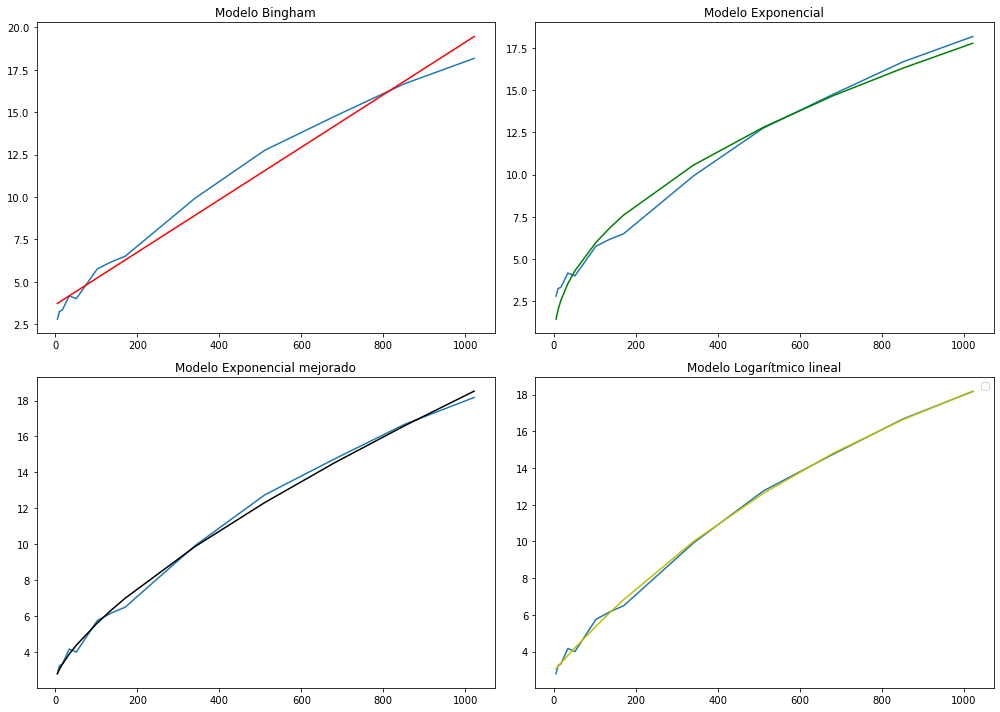

In [16]:
fig = plt.figure(figsize=(14,10))

x = np.array(flu.index)
y = np.array(flu.TAU)

#Modelo Bingham
coef = np.polyfit(x, y, 1)
z1 = coef[0]*x + coef[1]
ax0 = plt.subplot2grid((2,2), loc=(0,0))
ax0.plot(x,y)
ax0.plot(x,z1, "r")
ax0.set_title("Modelo Bingham")
         
#Modelo Exponencial
coef2 = sc.curve_fit(lambda x, a, b: a*(x ** b), x, y)
z2 = coef2[0][0]*(x ** coef2[0][1])
ax1 = plt.subplot2grid((2,2), loc=(0,1))
ax1.plot(x,y)
ax1.plot(x,z2, "g")
ax1.set_title("Modelo Exponencial")

#Modelo Exponencial modificado
coef3 = sc.curve_fit(lambda x, a, b, c: a+b*(x ** c), x, y)
z3 = coef3[0][0] + coef3[0][1]*(x ** coef3[0][2])
ax2 = plt.subplot2grid((2,2), loc=(1,0))
ax2.plot(x,y)
ax2.plot(x,z3, "k")
ax2.set_title("Modelo Exponencial mejorado")

#Modelo Logarítmico lineal
coef4 = sc.curve_fit(lambda x, a, b, c, k:((a*c-b)*np.log(c*x+1))/c**2+b*x/c+k, x, y)
a = coef4[0][0]
b = coef4[0][1]
c = coef4[0][2]
k = coef4[0][3]
z4 = ((a*c-b)*np.log(c*x+1))/c**2+b*x/c+k
ax3 = plt.subplot2grid((2,2), loc=(1,1))
ax3.plot(x,y)
ax3.plot(x,z4, "y")
ax3.set_title("Modelo Logarítmico lineal")

plt.legend()
plt.tight_layout()


plt.savefig("../results/Grafica_individual.png")

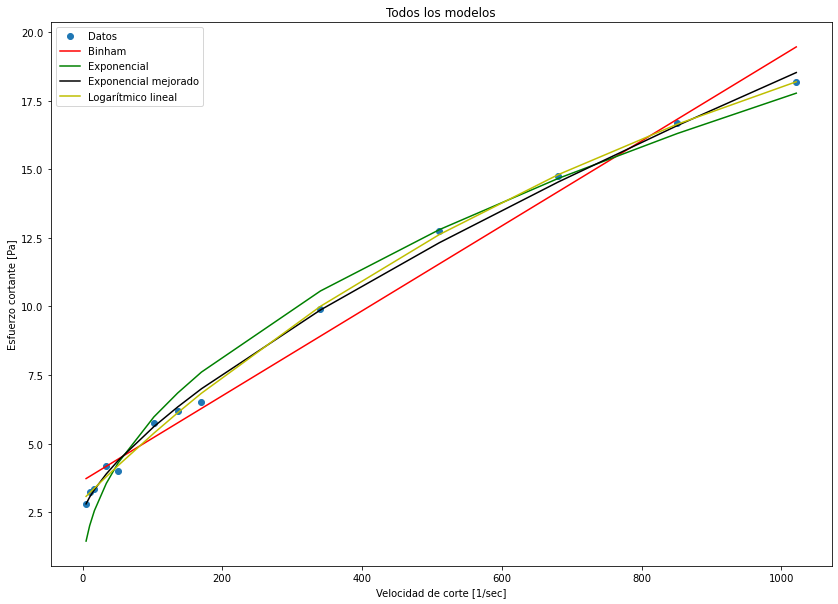

In [15]:
plt.figure(figsize=(14,10))

x = np.array(flu.index)
y = np.array(flu.TAU)

plt.plot(x,y, "o",label = "Datos")
plt.plot(x,z1, "r", label="Binham")
plt.plot(x,z2, "g", label="Exponencial")
plt.plot(x,z3, "k", label="Exponencial mejorado")
plt.plot(x,z4, "y", label="Logarítmico lineal")
plt.title("Todos los modelos")
plt.xlabel("Velocidad de corte [1/sec]")
plt.ylabel("Esfuerzo cortante [Pa]")

plt.legend()



plt.savefig("../results/Grafica_juntos.png")

In [15]:
x = np.array(flu.index)
y = np.array(flu.TAU)
sc.curve_fit(lambda x, a, b: b + a*x, x, y)

(array([0.01548172, 3.64441659]),
 array([[ 4.06396290e-07, -1.22875794e-04],
        [-1.22875794e-04,  8.34733651e-02]]))